In [1]:
from sklearn.cluster import KMeans
import clusters as cl
from sklearn.datasets import make_blobs
import minisom
from minisom import MiniSom 
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# this will reload modules that have changed
%load_ext autoreload
%autoreload 2

In [2]:
Ladata = cl.importData('iris_features.csv', 'iris_labels.csv')
darr = Ladata[0]
labels = Ladata[1]

In [3]:
k = cl.K(darr)
kmeans = KMeans(n_clusters=k)
kmeans.fit(darr)

KMeans(n_clusters=3)

In [4]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [5]:
cl.labelClusters(kmeans.labels_, labels)

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [6]:
cl.use_kmeans(darr, labels)

(KMeans(n_clusters=3), 0.8797315436241611, 3)

In [7]:
#som = MiniSom(6, 6, 4, sigma=0.3, learning_rate=0.5) # initialization of 6x6 SOM
#som.train(darr, 100) # trains the SOM with 100 iterations
#som = MiniSom(300, 300, 2, sigma=0.3, learning_rate=0.3) # initialization of 6x6 SOM
## Initialization and training
n_neurons = 9
m_neurons = 9
som = MiniSom(n_neurons, m_neurons, darr.shape[1], sigma=2.5, learning_rate=.25, 
              neighborhood_function='gaussian', random_seed=0)

som.pca_weights_init(darr)
som.train(darr, 1000, verbose=True)  # random trainingsom.train(X, 1000) # trains the SOM with 100 iterations

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.276598501391816


In [8]:
print(darr)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [9]:
som.winner(darr[0])

(0, 2)

In [10]:
somlist = []

In [11]:
#MAKE BMU LIST
for x in range(len(darr)):
    somlist.append(som.winner(darr[x]))
print(somlist)

[(0, 2), (1, 5), (0, 5), (0, 6), (0, 3), (1, 0), (0, 5), (0, 3), (0, 7), (1, 5), (0, 1), (1, 4), (0, 5), (0, 7), (0, 0), (1, 0), (0, 0), (0, 2), (1, 0), (1, 1), (1, 2), (1, 2), (0, 4), (1, 3), (1, 4), (1, 5), (1, 3), (0, 2), (0, 2), (1, 5), (1, 5), (1, 2), (0, 0), (0, 0), (1, 5), (0, 4), (0, 1), (0, 3), (0, 7), (0, 3), (0, 3), (0, 7), (0, 6), (1, 3), (2, 2), (0, 6), (1, 1), (0, 6), (0, 1), (0, 4), (5, 0), (4, 1), (5, 0), (4, 7), (4, 0), (7, 7), (4, 2), (2, 8), (4, 0), (5, 8), (3, 8), (4, 4), (4, 6), (5, 4), (3, 4), (4, 0), (7, 7), (4, 6), (5, 5), (4, 7), (8, 6), (4, 5), (6, 5), (5, 4), (4, 4), (4, 0), (5, 0), (5, 1), (4, 3), (3, 6), (4, 8), (3, 7), (4, 6), (7, 5), (8, 8), (4, 2), (5, 0), (5, 5), (6, 8), (5, 8), (7, 8), (4, 3), (4, 6), (3, 8), (6, 8), (6, 7), (6, 7), (4, 4), (2, 7), (6, 8), (8, 2), (8, 5), (8, 1), (7, 3), (8, 2), (8, 0), (8, 8), (8, 0), (7, 1), (8, 1), (6, 2), (7, 4), (7, 2), (8, 5), (8, 5), (8, 3), (7, 3), (8, 0), (8, 0), (6, 5), (7, 1), (8, 6), (8, 0), (6, 4), (8, 2),

In [26]:

plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()


SyntaxError: invalid syntax (4072857030.py, line 14)

In [13]:
cl.use_kmeans(somlist, labels)

(KMeans(n_clusters=3), 0.8171812080536913, 3)

In [16]:
cl.use_kmeans(somlist, kmeans.labels_)

(KMeans(n_clusters=3), 0.8653243847874721, 3)

In [18]:
cl.use_kmeans(darr, labels)

(KMeans(n_clusters=3), 0.8797315436241611, 3)

In [19]:
x=5
#a=x
for x in range(5, 10):
    #som = MiniSom(6, 6, 4, sigma=0.3, learning_rate=0.5) # initialization of 6x6 SOM
    #som.train(darr, 100) # trains the SOM with 100 iterations
    #som = MiniSom(300, 300, 2, sigma=0.3, learning_rate=0.3) # initialization of 6x6 SOM
    ## Initialization and training
    n_neurons = x
    m_neurons = x
    som = MiniSom(n_neurons, m_neurons, darr.shape[1], sigma=1, learning_rate=.25, 
              neighborhood_function='gaussian', random_seed=0)

    som.pca_weights_init(darr)
    som.train(darr, 100, verbose=True)  # random trainingsom.train(X, 1000) # trains the SOM with 1000 iterations
    
  

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 1.057160219239756
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 1.055918366565133
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 1.0551165275234125
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 1.0545576471824722
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 1.0541464539850105


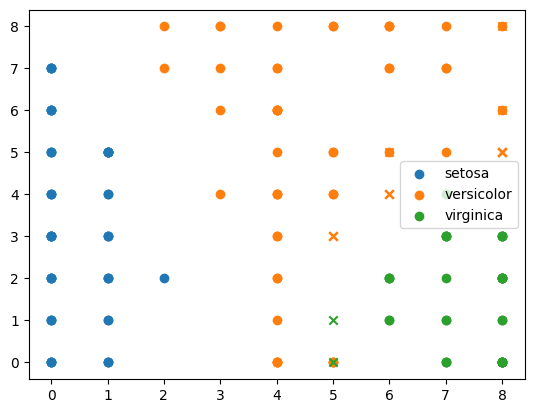

In [28]:
cl.plotKMeans(somlist, kmeans.labels_, labels)

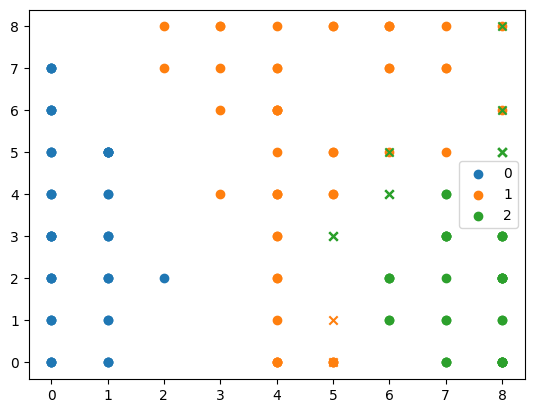

In [29]:
cl.plotKMeans(somlist, labels, kmeans.labels_)